# 1. 데이터 불러오기 및 둘러보기

- 거리기반 학습 모델링을 위해 PCA를 추출하기까지 전처리 과정 수행하도록 한다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car_df = pd.read_csv('cars.csv')

In [3]:
brand_df = pd.read_csv('brand.csv')

In [4]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [6]:
car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [7]:
brand_df

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States
5,volvo,Sweden
6,peugeot,France
7,bmw,Germany
8,citroen,France
9,mercedes-benz,Germany


In [8]:
brand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


# 2. 중복 데이터 확인 및 처리

In [9]:
# 중복 데이터 확인

car_df[car_df.duplicated()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
12,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
20,CITROEN C4,1949,114000,2013,NaN,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 5,NaN
25,VAUXHALL INSIGNIA,2950,79000,2011,4.0,Petrol,Hatchback,1.8L,Manual,5.0,5.0,Euro 5,NaN
39,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3L,Automatic,5.0,5.0,Euro 6,NaN
52,VAUXHALL CORSA,10698,22782,2020,NaN,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,MINI HATCH,11999,33156,2018,1.0,Petrol,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,Full
3663,VAUXHALL ASTRA,4999,60139,2015,2.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,NaN
3674,MITSUBISHI OUTLANDER,1489,145000,2007,NaN,Diesel,SUV,2.0L,Manual,5.0,7.0,Euro 4,NaN
3675,VAUXHALL ASTRA,4999,60139,2015,2.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,NaN


In [10]:
# 첫번째 중복 레코드(index 12)를 확인해본다.

car_df[(car_df['title'] == 'SKODA FABIA') & (car_df['Mileage(miles)'] == 70189)]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
12,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
391,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
402,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
571,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
624,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
675,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
676,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
688,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
689,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN


In [11]:
# 두번째 중복 레코드(index 12)를 확인해본다.

car_df[(car_df['title'] == 'CITROEN C4') & (car_df['Mileage(miles)'] == 114000)]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
19,CITROEN C4,1949,114000,2013,NaN,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 5,NaN
20,CITROEN C4,1949,114000,2013,NaN,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 5,NaN


In [12]:
# 같은 종류의 자동차일 수 있어도, 마일리지까지 정확히 같은 경우는 상식적으로 거의 없기 때문에 중복데이터를 삭제하기로 한다.

car_df = car_df.drop_duplicates()
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


# 3. 결측치 확인 및 처리

In [13]:
# 컬럼별 결측치 개수 확인

car_df.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners       983
Fuel type               0
Body type               0
Engine                 17
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         59
Service history      2413
dtype: int64

In [14]:
# 결측치 비율 확인

car_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.343827
Fuel type            0.000000
Body type            0.000000
Engine               0.005946
Gearbox              0.000000
Doors                0.008744
Seats                0.012242
Emission Class       0.020637
Service history      0.844001
dtype: float64

- Previous Owners, Service history 컬럼에 과도한 결측치를 확인할 수 있다.
- 그 외 Engine, Doors, Seats, Emission Class 컬럼에도 결측치가 있다.
- 너무 많은 결측치가 있으므로 컬럼별 세부적인 탐색 과정에서 구체적인 처리 전략을 세우도록 한다.

# 4-1. 이상치 탐지 및 처리 - title 컬럼

In [15]:
# title 컬럼 확인 

car_df['title'].value_counts()

VAUXHALL CORSA                                   157
FORD FIESTA                                      111
VAUXHALL ASTRA                                   104
BMW 3 SERIES                                      96
FORD FOCUS                                        93
                                                ... 
PROTON PROTON                                      1
ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO      1
KIA STONIC                                         1
TOYOTA PRIUS+                                      1
HONDA PRELUDE                                      1
Name: title, Length: 455, dtype: int64

- 455 종류의 자동차를 확인할 수 있다.
- 컬럼 내의 수준이 455개가 되기 때문에 히스토그램으로만 분포를 확인해본다.
- 4-14.에서 다시 한번 확인해볼 것.

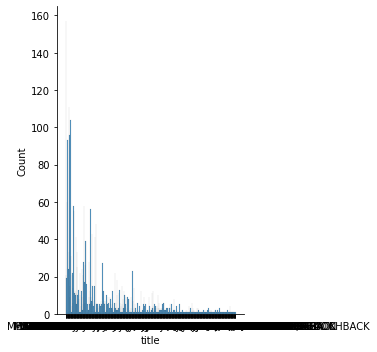

In [16]:
# title 컬럼을 히스토그램으로 확인

sns.displot(car_df['title'])

# 4-2. 이상치 탐지 및 처리 - Price 컬럼

In [17]:
# Price 컬럼 확인 

car_df['Price'].value_counts()

2495     109
1995      71
3995      48
2995      46
2490      37
        ... 
5675       1
1998       1
9870       1
12800      1
1745       1
Name: Price, Length: 866, dtype: int64

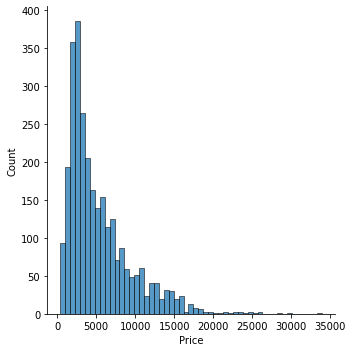

In [18]:
# Price 컬럼을 히스토그램으로 확인

sns.displot(car_df['Price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

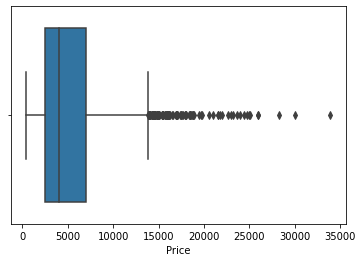

In [19]:
# Price 컬럼의 분포를 박스플롯으로 확인

sns.boxplot(car_df['Price'])

<AxesSubplot:ylabel='Price'>

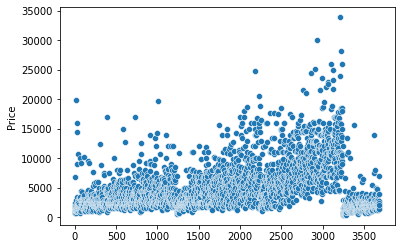

In [20]:
# Price 컬럼의 분포를 산점도로 확인

sns.scatterplot(x = car_df.index, y = car_df['Price'])

- Price 변수의 히스토그램을 보면 분포가 오른쪽으로 기울어져 있고, 이상치를 확인할 수 있다.
- 거리기반 예측 모델을 만들 것이기 때문에 z-score를 이용해서 이상치를 처리하기로 한다.

In [21]:
# s-score 2.65을 임계값으로 이상치 확인 및 처리

# z-score 함수 정의
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) > z].index

In [22]:
# s-score 가 2.65를 초과 하는 레코드

car_df.loc[outlier(car_df, 'Price', 2.65)]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
13,BMW 3 SERIES,19800,69690,2019,1.0,Petrol Plug-in Hybrid,Saloon,2.0L,Automatic,4.0,5.0,Euro 6,NaN
387,MERCEDES-BENZ A CLASS,16997,60000,2019,NaN,Diesel,Hatchback,1.5L,Automatic,5.0,5.0,Euro 6,Full
731,MERCEDES-BENZ A CLASS,16990,18137,2019,NaN,Petrol,Hatchback,1.3L,Automatic,5.0,5.0,Euro 6,NaN
1001,LAND ROVER RANGE ROVER EVOQUE,19698,49068,2019,NaN,Diesel,SUV,2.0L,Manual,5.0,5.0,Euro 6,NaN
2002,AUDI A6,16995,66229,2017,1.0,Diesel,Saloon,2.0L,Automatic,4.0,5.0,Euro 6,NaN
2042,PEUGEOT 3008,17990,9669,2019,1.0,Diesel,SUV,1.5L,Manual,5.0,5.0,Euro 6,NaN
2045,ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO,17000,17670,2020,1.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 6,NaN
2080,KIA STONIC,18750,12875,2022,NaN,Petrol Hybrid,SUV,1.0L,Manual,5.0,5.0,Euro 6,NaN
2183,DS AUTOMOBILES DS 9,24770,16864,2021,1.0,Petrol Plug-in Hybrid,Saloon,1.6L,Automatic,4.0,5.0,Euro 6,NaN
2205,MERCEDES-BENZ C CLASS,16880,64806,2016,NaN,Diesel,Coupe,2.1L,Automatic,2.0,4.0,Euro 6,NaN


In [23]:
# z-score가 2.65를 초과하는 레코드 중 Price의 최솟값을 확인

car_df.loc[outlier(car_df, 'Price', 2.65)]['Price'].min()

16495

In [24]:
# z-score가 2.65를 초과하는 레코드 제거

car_df = car_df[car_df['Price'] < 16495]
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


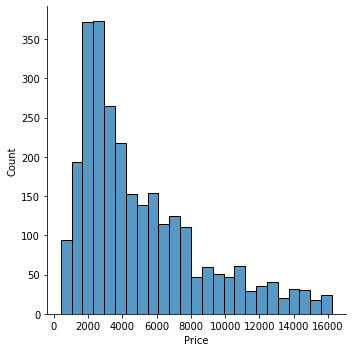

In [25]:
# z-score method 적용 후 분포 확인

sns.displot(car_df['Price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

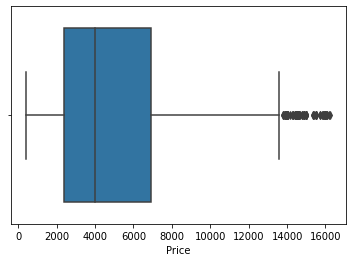

In [26]:
sns.boxplot(car_df['Price'])

<AxesSubplot:ylabel='Price'>

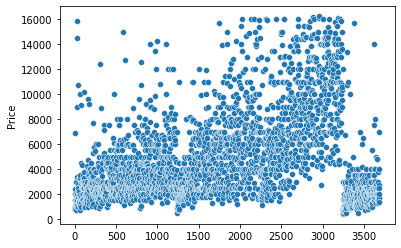

In [27]:
sns.scatterplot(x = car_df.index, y = car_df['Price'])

# 4-3. 이상치 탐지 및 처리 - Mileage(miles) 컬럼

In [28]:
# 컬럼 이름을 Mileage 로 바꾸기로 한다.

car_df = car_df.rename({'Mileage(miles)': 'Mileage'}, axis = 1)
car_df

,title,Price,Mileage,Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [29]:
# Mileage 컬럼 확인 

car_df['Mileage'].sort_values()

2013          6
2657       4750
3227       6461
2949       6561
3160       6669
         ...   
3570     208000
8        225318
244      234680
1259     274100
1037    1110100
Name: Mileage, Length: 2804, dtype: int64

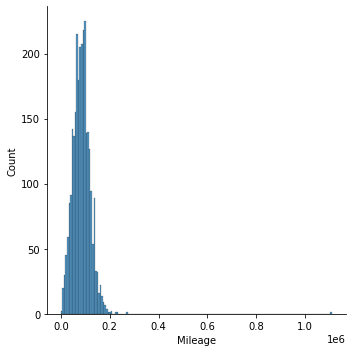

In [30]:
# Mileage 컬럼을 히스토그램으로 확인

sns.displot(car_df['Mileage'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

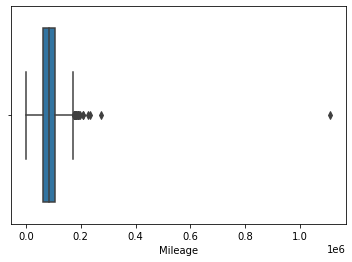

In [31]:
# Mileage 컬럼의 분포를 박스플롯으로 확인

sns.boxplot(car_df['Mileage'])

<AxesSubplot:ylabel='Mileage'>

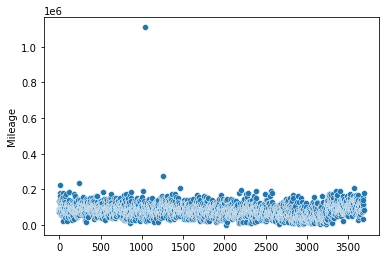

In [32]:
# Mileage 컬럼의 분포를 산점도로 확인

sns.scatterplot(x = car_df.index, y = car_df['Mileage'])

- Mileage 변수의 히스토그램을 보면 이상치를 제거하면 정규분포 모양이 나올 것으로 보인다.
- 거리기반 예측 모델을 만들 것이기 때문에 z-score를 이용해서 이상치를 처리하기로 한다.

In [33]:
# s-score 가 2.65를 초과 하는 레코드

car_df.loc[outlier(car_df, 'Mileage', 2.65)]

,title,Price,Mileage,Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN
244,AUDI A6 AVANT,2600,234680,2011,1.0,Diesel,Estate,2.0L,Manual,5.0,5.0,Euro 5,NaN
1011,BMW 7 SERIES,2600,189000,2008,5.0,Diesel,Saloon,3.0L,Automatic,4.0,5.0,Euro 4,NaN
1037,VOLKSWAGEN BEETLE,2495,1110100,2003,4.0,Petrol,Hatchback,2.0L,Automatic,3.0,4.0,Euro 4,NaN
1259,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
1459,MERCEDES-BENZ S CLASS,4769,207734,2012,NaN,Diesel,Saloon,3.0L,Automatic,4.0,5.0,Euro 6,NaN
2198,SKODA OCTAVIA,4995,197790,2013,4.0,Diesel,Estate,2.0L,Manual,5.0,5.0,Euro 5,NaN
2387,MERCEDES-BENZ S CLASS,1995,189988,2005,NaN,Diesel,Saloon,3.2L,Automatic,4.0,5.0,Euro 3,NaN
2567,VOLKSWAGEN PASSAT,5950,190000,2016,1.0,Diesel,Estate,2.0L,Automatic,5.0,5.0,Euro 6,Full
3350,HONDA ACCORD,950,192567,2007,5.0,Diesel,Saloon,2.2L,Manual,4.0,5.0,Euro 4,NaN


In [34]:
# z-score가 2.65를 초과하는 레코드 중 Mileage의 최솟값을 확인

car_df.loc[outlier(car_df, 'Mileage', 2.65)]['Mileage'].min()

189000

In [35]:
# z-score가 2.65를 초과하는 레코드 제거

car_df = car_df[car_df['Mileage'] < 189000]
car_df

,title,Price,Mileage,Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


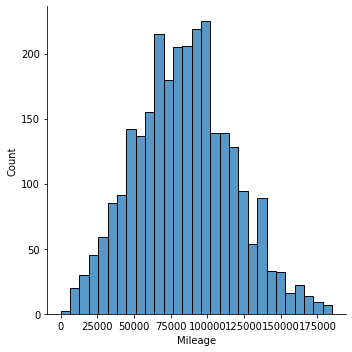

In [36]:
# z-score method 적용 후 분포 확인

sns.displot(car_df['Mileage'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

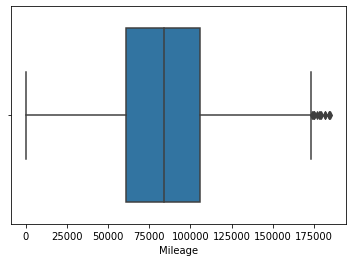

In [37]:
sns.boxplot(car_df['Mileage'])

<AxesSubplot:ylabel='Mileage'>

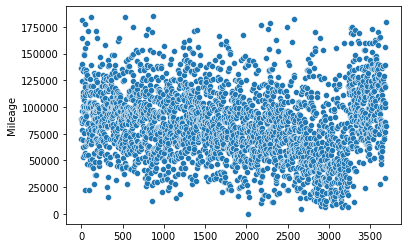

In [38]:
sns.scatterplot(x = car_df.index, y = car_df['Mileage'])

- 이상치 제거 후 멋진 모양의 정규분포가 나왔다.

# 4-4. 이상치 탐지 및 처리 - Registration_Year 컬럼

In [39]:
# Registration_Year 컬럼 확인 

car_df['Registration_Year'].sort_values()

3024    1953
237     1972
2375    1981
1239    1985
1195    1987
        ... 
3047    2022
3114    2022
3191    2022
3140    2022
3173    2023
Name: Registration_Year, Length: 2792, dtype: int64

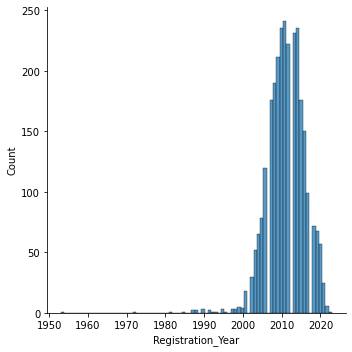

In [40]:
# Registration_Year 컬럼을 히스토그램으로 확인

sns.displot(car_df['Registration_Year'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Registration_Year'>

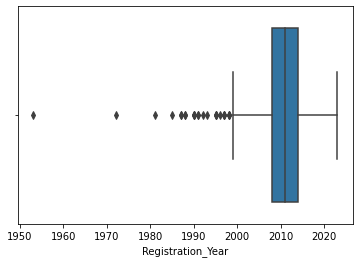

In [41]:
# Registration_Year 컬럼의 분포를 박스플롯으로 확인

sns.boxplot(car_df['Registration_Year'])

<AxesSubplot:ylabel='Registration_Year'>

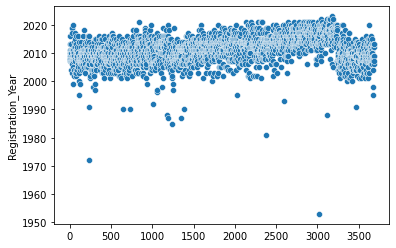

In [42]:
# Registration_Year 컬럼의 분포를 산점도로 확인

sns.scatterplot(x = car_df.index, y = car_df['Registration_Year'])

- Registration_Year 변수의 히스토그램은 이상치를 제거하면 정규분포를 따른 것으로 보인다.
- Registration_Year 변수는 1Q - 1.5 * IQR 범위를 넘어서는 값을 제거하기로 한다.
- (약 20년이 넘은 옛날 데이터는 제거하기로 한다.)

In [43]:
# 사분위 범위수를 이용한 이상치 탐지

Q3, Q1 = np.percentile(car_df['Registration_Year'], [75 ,25])
IQR = Q3 - Q1
IQR

# 이상치들
car_df[(Q1-1.5*IQR > car_df['Registration_Year'])|(Q3+1.5*IQR < car_df['Registration_Year'])]

,title,Price,Mileage,Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
107,CITROEN XM,3250,126000,1995,4.0,Diesel,Hatchback,2.5L,Manual,5.0,NaN,Euro 2,NaN
229,MERCEDES-BENZ 260,2995,57400,1991,NaN,Petrol,Saloon,2.6L,Automatic,4.0,NaN,NaN,NaN
237,MG MIDGET,1875,75043,1972,3.0,Petrol,Convertible,1.3L,Manual,2.0,NaN,NaN,NaN
278,FORD MONDEO,1400,84000,1998,2.0,Petrol,Saloon,2.0L,Automatic,4.0,5.0,Euro 2,NaN
305,LEXUS GS 300,1990,72000,1997,5.0,Petrol,Saloon,3.0L,Automatic,4.0,5.0,Euro 2,NaN
645,ROVER MINI,1650,49309,1990,4.0,Petrol,Saloon,1.0L,Automatic,2.0,NaN,NaN,NaN
733,TOYOTA CAMRY,2389,125000,1990,NaN,Petrol,Estate,2.0L,Automatic,5.0,NaN,NaN,NaN
1006,SAAB 900,5995,157000,1992,5.0,Petrol,Convertible,2.0L,Manual,2.0,NaN,Euro 1,NaN
1053,VOLKSWAGEN GOLF,1250,110000,1996,NaN,Petrol,Convertible,2.0L,Manual,2.0,NaN,Euro 1,NaN
1059,PEUGEOT 306,2695,25240,1997,3.0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 2,NaN


In [44]:
# 데이터 이상치 제거
car_df = car_df[(Q1-1.5*IQR < car_df['Registration_Year'])&(Q3+1.5*IQR > car_df['Registration_Year'])]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Registration_Year'>

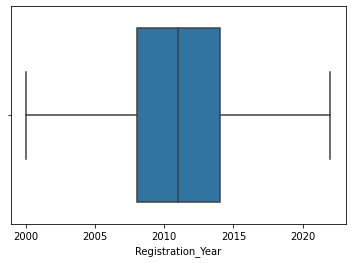

In [45]:
# 이상치 처리 후 분포 확인

sns.boxplot(car_df['Registration_Year'])

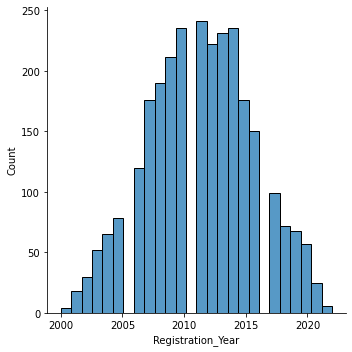

In [46]:
sns.displot(car_df['Registration_Year'])

<AxesSubplot:ylabel='Registration_Year'>

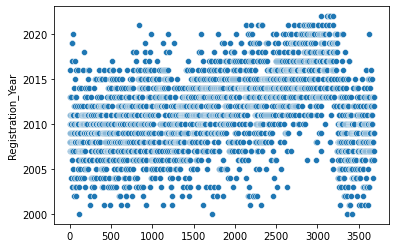

In [47]:
sns.scatterplot(x = car_df.index, y = car_df['Registration_Year'])

- Very good shape!

# 4-5. 이상치 탐지 및 처리 - Previous Owners 컬럼

In [48]:
# 컬럼 이름을 Previous_Owners 로 바꾸기로 한다.

car_df = car_df.rename({'Previous Owners': 'Previous_Owners'}, axis = 1)
car_df

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [49]:
# Previous_Owners 컬럼 확인 

car_df['Previous_Owners'].value_counts()

2.0    519
3.0    429
1.0    325
4.0    265
5.0    165
6.0     53
7.0     36
8.0     11
9.0      5
Name: Previous_Owners, dtype: int64

In [50]:
# 앞서 살펴봤던대로 Previous_Owners 컬럼은 결측치를 포함하고 있다.

car_df['Previous_Owners'].isna().sum()

953

- 4-14. 에서 이 컬럼의 결측치에 대해 다시 다루기로 한다.

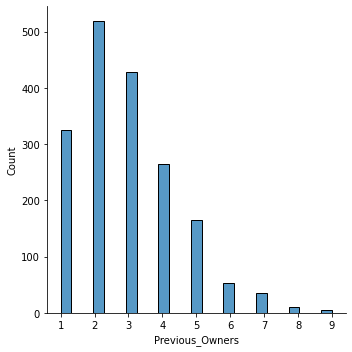

In [51]:
# Previous_Owners 컬럼을 히스토그램으로 확인

sns.displot(car_df['Previous_Owners'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previous_Owners'>

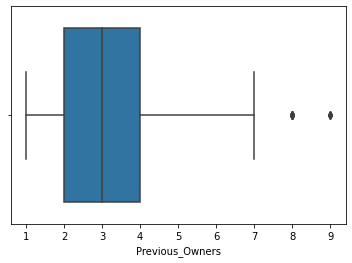

In [52]:
# Previous_Owners 컬럼의 분포를 박스플롯으로 확인

sns.boxplot(car_df['Previous_Owners'])

<AxesSubplot:ylabel='Previous_Owners'>

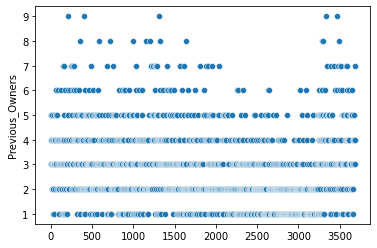

In [53]:
# Previous_Owners 컬럼의 분포를 산점도로 확인

sns.scatterplot(x = car_df.index, y = car_df['Previous_Owners'])

- Previous_Owners 값 중 Q3 + 1.5*IQR 을 초과하는 값을 이상치로 제거하기로 한다.

# 문제해결 회고 (설명을 위해 아래 코드에 작성)

In [54]:
# 위 박스플롯을 바탕으로 8, 9 에 해당하는 이상치를 제거한다.

# 문제해결 회고 : car_df[(car_df['Previous_Owners'] < 8)] 이 코드로 8, 9 값을 
# 날리면 Null 값까지 사라지므로 아래와 같이 코드를 작성하여 문제를 해결하였다.
# 중간에 800여개의 레코드가 사라져 원인을 찾게 되었다.

car_df = car_df[(car_df['Previous_Owners'] != 8) 
                & (car_df['Previous_Owners'] != 9)]
car_df['Previous_Owners'].value_counts()

2.0    519
3.0    429
1.0    325
4.0    265
5.0    165
6.0     53
7.0     36
Name: Previous_Owners, dtype: int64

In [55]:
# null 값이 사라지지 않았는지 확인
car_df['Previous_Owners'].isna().sum()

953

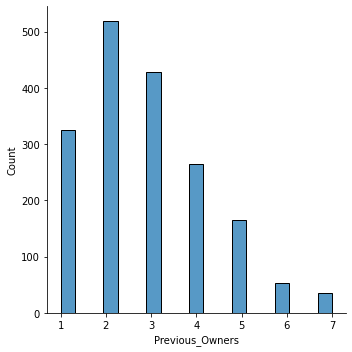

In [56]:
# 이상치 제거 후 분포 확인

sns.displot(car_df['Previous_Owners'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previous_Owners'>

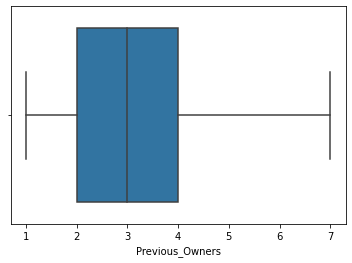

In [57]:
sns.boxplot(car_df['Previous_Owners'])

<AxesSubplot:ylabel='Previous_Owners'>

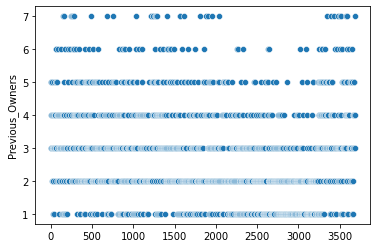

In [58]:
sns.scatterplot(x = car_df.index, y = car_df['Previous_Owners'])

# 4-6. 이상치 탐지 및 처리 - Fuel type 컬럼

In [59]:
# 컬럼 이름을 Fuel_type 로 바꾸기로 한다.

car_df = car_df.rename({'Fuel type': 'Fuel_type'}, axis = 1)

In [60]:
# Fuel_type 컬럼 확인. 앞서 살펴봤을 때 Fuel_type 컬럼은 결측치를 포함하지 않았다.

car_df['Fuel_type'].value_counts()

Petrol                   1752
Diesel                    968
Petrol Hybrid              18
Petrol Plug-in Hybrid       4
Electric                    3
Name: Fuel_type, dtype: int64

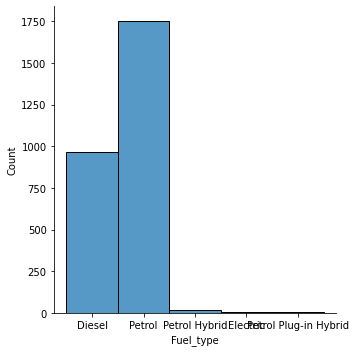

In [61]:
# Fuel_type 컬럼을 히스토그램으로 확인

sns.displot(car_df['Fuel_type'])

In [62]:
# 적은 수의 Petrol Hybrid, Petrol Plug-in Hybrid, Electric 은 삭제하도록 한다.


# 특정 컬럼의 특정 값들을 제거하고자 하는 조건 설정
column_to_remove_from = 'Fuel_type'
values_to_remove = ['Petrol Hybrid', 'Petrol Plug-in Hybrid', 'Electric']  
# 제거하고자 하는 특정 값들을 리스트로 지정

# 특정 값들을 제거한 새로운 데이터프레임 생성
car_df = car_df[~car_df[column_to_remove_from].isin(values_to_remove)]
car_df['Fuel_type'].value_counts()

Petrol    1752
Diesel     968
Name: Fuel_type, dtype: int64

# 4-7. 이상치 탐지 및 처리 - Body type 컬럼

In [63]:
# 컬럼 이름을 Body_type 로 바꾸기로 한다.

car_df = car_df.rename({'Body type': 'Body_type'}, axis = 1)

In [64]:
# Body_type 컬럼 확인. 앞서 살펴봤을 때 Body_type 컬럼은 결측치를 포함하지 않았다.

car_df['Body_type'].value_counts()

Hatchback      1660
SUV             354
Saloon          278
MPV             132
Estate          110
Coupe            96
Convertible      85
Combi Van         2
Pickup            2
Minibus           1
Name: Body_type, dtype: int64

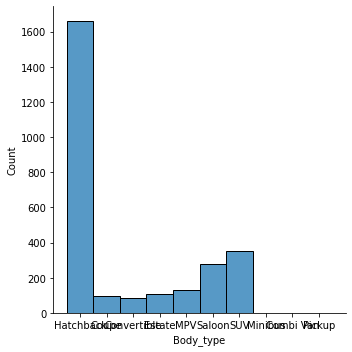

In [65]:
# Body_type 컬럼을 히스토그램으로 확인

sns.displot(car_df['Body_type'])

In [66]:
# 적은 수의 Minibus, Combi Van, Pickup은 삭제하도록 한다.


# 특정 컬럼의 특정 값들을 제거하고자 하는 조건 설정
column_to_remove_from = 'Body_type'
values_to_remove = ['Minibus', 'Combi Van', 'Pickup']  
# 제거하고자 하는 특정 값들을 리스트로 지정

# 특정 값들을 제거한 새로운 데이터프레임 생성
car_df = car_df[~car_df[column_to_remove_from].isin(values_to_remove)]
car_df['Body_type'].value_counts()

Hatchback      1660
SUV             354
Saloon          278
MPV             132
Estate          110
Coupe            96
Convertible      85
Name: Body_type, dtype: int64

# 4-8. 이상치 탐지 및 처리 - Engine 컬럼

In [67]:
# Engine 컬럼 확인.

car_df['Engine'].value_counts()

1.6L    531
2.0L    446
1.2L    390
1.4L    354
1.0L    200
1.5L    160
1.3L    120
1.8L    117
3.0L     69
2.2L     64
2.1L     50
1.7L     35
2.5L     28
1.9L     28
1.1L     20
2.4L     19
0.9L     14
2.7L     10
3.5L      9
3.2L      6
3.7L      5
4.4L      5
4.2L      4
5.0L      3
2.8L      3
0.8L      2
2.6L      2
4.3L      2
2.3L      2
3.1L      1
3.3L      1
5.5L      1
4.8L      1
6.3L      1
Name: Engine, dtype: int64

In [68]:
# 앞서 살펴봤을 때 Engine 컬럼은 작은 비율의 결측치를 포함하고 있었다.

car_df[car_df['Engine'].isna()]

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
679,BMW 3 SERIES,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full
835,TOYOTA MARK X,7500,77000,2021,3.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,NaN
856,NISSAN CUBIC,4500,47000,2007,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,NaN
1087,AUDI A1,7995,50500,2012,NaN,Petrol,Hatchback,NaN,Automatic,3.0,4.0,NaN,NaN
1304,MAZDA MAZDA6,1500,155670,2015,1.0,Diesel,Estate,NaN,Manual,NaN,NaN,NaN,NaN
1429,FORD FOCUS,1895,109000,2009,NaN,Petrol,Hatchback,NaN,Manual,5.0,5.0,NaN,NaN
1533,CITROEN C1,3900,71000,2015,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,NaN
1619,FORD KA,2490,68837,2007,4.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Full
2022,AUDI A3,5750,139225,2012,3.0,Diesel,Hatchback,NaN,Automatic,NaN,NaN,NaN,NaN
2523,FIAT 500L,5250,79308,2015,1.0,Diesel,MPV,NaN,Automatic,NaN,NaN,NaN,Full


In [69]:
# 해당 레코드들은 많은 null 값을 가지므로 삭제하기로 한다
car_df.dropna(subset = ['Engine'], inplace = True)

# 확인
car_df[car_df['Engine'].isna()]

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission Class,Service history


In [70]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2703 non-null   object 
 1   Price              2703 non-null   int64  
 2   Mileage            2703 non-null   int64  
 3   Registration_Year  2703 non-null   int64  
 4   Previous_Owners    1765 non-null   float64
 5   Fuel_type          2703 non-null   object 
 6   Body_type          2703 non-null   object 
 7   Engine             2703 non-null   object 
 8   Gearbox            2703 non-null   object 
 9   Doors              2692 non-null   float64
 10  Seats              2696 non-null   float64
 11  Emission Class     2682 non-null   object 
 12  Service history    427 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 295.6+ KB


In [71]:
# Engine 컬럼의 데이터 분포를 확인하기 위해 실수형으로 변환한다.
# 문자열 L을 제거하여 실수형으로 만들기로 한다. 

car_df['Engine'] = car_df['Engine'].str[:3].astype('float')
car_df['Engine']

0       1.4
1       1.2
2       1.4
3       1.4
4       1.3
       ... 
3682    1.6
3683    2.0
3684    2.0
3685    2.2
3686    1.2
Name: Engine, Length: 2703, dtype: float64

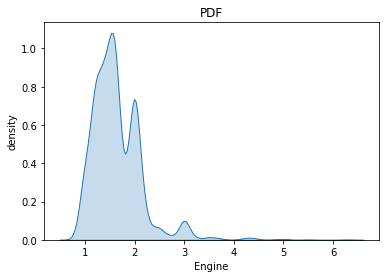

In [72]:
import matplotlib.pyplot as plt

# Engine 컬럼의 확률밀도함수의 분포를 확인
sns.kdeplot(car_df['Engine'], shade=True)

# 그래프 제목과 라벨 설정
plt.title("PDF")
plt.xlabel("Engine")
plt.ylabel("density")

# 그래프 표시
plt.show()

In [73]:
# s-score 가 2.65를 초과 하는 레코드를 확인해 본다

car_df.loc[outlier(car_df, 'Engine', 2.65)]

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
23,PEUGEOT 407,1995,89000,2007,NaN,Petrol,Coupe,3.0,Automatic,2.0,4.0,Euro 4,NaN
80,FORD MONDEO,1990,84815,2003,5.0,Petrol,Hatchback,3.0,Manual,5.0,5.0,Euro 4,NaN
86,NISSAN 350 Z,4300,100479,2004,3.0,Petrol,Coupe,3.5,Manual,2.0,2.0,Euro 3,Full
97,VOLKSWAGEN PASSAT,2495,104000,2006,NaN,Petrol,Saloon,3.2,Automatic,4.0,5.0,Euro 4,NaN
122,BMW 5 SERIES,2950,139000,2004,NaN,Petrol,Saloon,3.0,Automatic,4.0,5.0,Euro 3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,BMW X5,4495,115000,2007,NaN,Diesel,SUV,3.0,Automatic,5.0,5.0,Euro 4,NaN
3363,AUDI Q7,1994,145000,2006,NaN,Diesel,SUV,3.0,Automatic,5.0,7.0,Euro 4,NaN
3418,HONDA ACCORD,1195,153636,2000,NaN,Petrol,Coupe,3.0,Automatic,2.0,4.0,Euro 3,NaN
3522,HONDA LEGEND,2499,79000,2001,NaN,Petrol,Saloon,3.5,Automatic,4.0,5.0,Euro 2,NaN


In [74]:
car_df.loc[outlier(car_df, 'Engine', 2.65)]['Engine'].value_counts()

3.0    69
3.5     9
3.2     6
3.7     5
4.4     5
4.2     4
5.0     3
4.3     2
3.1     1
3.3     1
5.5     1
4.8     1
6.3     1
Name: Engine, dtype: int64

In [75]:
# z-score가 2.65를 초과하는 레코드 중 Engine의 최솟값을 확인

car_df.loc[outlier(car_df, 'Engine', 2.65)]['Engine'].min()

3.0

In [76]:
# z-score가 2.65를 초과하는 레코드 제거

car_df = car_df[car_df['Engine'] < 3.0]
car_df['Engine'].value_counts()

1.6    531
2.0    446
1.2    390
1.4    354
1.0    200
1.5    160
1.3    120
1.8    117
2.2     64
2.1     50
1.7     35
1.9     28
2.5     28
1.1     20
2.4     19
0.9     14
2.7     10
2.8      3
0.8      2
2.6      2
2.3      2
Name: Engine, dtype: int64

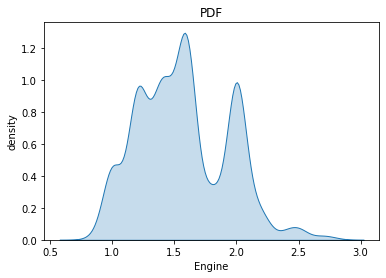

In [77]:
# 이상치 제거 후 분포 확인

sns.kdeplot(car_df['Engine'], shade=True)

plt.title("PDF")
plt.xlabel("Engine")
plt.ylabel("density")

plt.show()

# 4-9. 이상치 탐지 및 처리 - Gearbox 컬럼

In [78]:
# Gearbox 컬럼 확인. 앞서 살펴봤듯이 Gearbox 컬럼에는 결측치가 존재하지 않는다.

car_df['Gearbox'].value_counts()

Manual       2116
Automatic     479
Name: Gearbox, dtype: int64

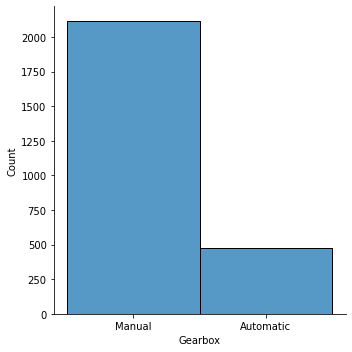

In [79]:
# Gearbox 컬럼을 히스토그램으로 확인

sns.displot(car_df['Gearbox'])

- Gearbox 컬럼은 그냥 넘어가도 상관 없을 듯 하다.

# 4-10. 이상치 탐지 및 처리 - Doors 컬럼

In [80]:
car_df['Doors'].value_counts()

5.0    1688
3.0     532
4.0     240
2.0     126
Name: Doors, dtype: int64

In [81]:
# Doors 컬럼의 결측치 확인
car_df['Doors'].isna().sum()

9

In [82]:
car_df['Doors'].isna().mean()

0.003468208092485549

In [83]:
car_df[car_df['Doors'].isna()]

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
513,NISSAN LAFESTA,3900,37000,2012,NaN,Petrol,MPV,2.0,Automatic,NaN,NaN,NaN,NaN
595,VAUXHALL ASTRA,3950,56800,2015,4.0,Diesel,Hatchback,1.7,Manual,NaN,5.0,NaN,NaN
699,MITSUBISHI FTO,8900,58900,2001,NaN,Petrol,Coupe,2.0,Automatic,NaN,NaN,NaN,NaN
823,VOLKSWAGEN POLO,6700,49600,2012,NaN,Petrol,Hatchback,1.2,Automatic,NaN,NaN,NaN,NaN
1058,VOLKSWAGEN POLO,6450,53193,2011,NaN,Petrol,Hatchback,1.2,Automatic,NaN,5.0,NaN,NaN
1060,BMW 3 SERIES,4000,94000,2007,2.0,Petrol,Saloon,2.5,Automatic,NaN,NaN,NaN,NaN
1140,VOLKSWAGEN POLO,6900,35515,2012,NaN,Petrol,Hatchback,1.2,Automatic,NaN,5.0,NaN,NaN
1613,VOLKSWAGEN GOLF,1895,61000,2001,5.0,Petrol,Hatchback,1.6,Automatic,NaN,5.0,NaN,NaN
2762,HONDA FIT,4450,79208,2010,1.0,Petrol,Hatchback,1.3,Automatic,NaN,5.0,NaN,NaN


In [84]:
# 결측치는 제거하기로 한다.

# 결측치 제거
car_df.dropna(subset = ['Doors'], inplace = True)

# 확인
car_df[car_df['Doors'].isna()]

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission Class,Service history


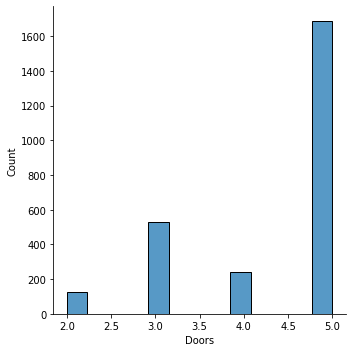

In [85]:
# Doors 컬럼을 히스토그램으로 확인

sns.displot(car_df['Doors'])

# 4-11. 이상치 탐지 및 처리 - Seats 컬럼

In [86]:
car_df.shape

(2586, 13)

In [87]:
car_df['Seats'].value_counts()

5.0    2111
4.0     367
7.0      82
2.0      20
3.0       2
6.0       2
Name: Seats, dtype: int64

In [88]:
# Seats 컬럼의 결측치 확인
car_df['Seats'].isna().sum()

2

In [89]:
# 결측치 제거
car_df.dropna(subset = ['Seats'], inplace = True)

# 확인
car_df[car_df['Seats'].isna()]

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission Class,Service history


In [90]:
# 3.0 과 6.0 은 제거하기로 한다.
car_df = car_df[(car_df['Seats'] != 3) & (car_df['Seats'] != 6)]

# 확인
car_df['Seats'].value_counts()

5.0    2111
4.0     367
7.0      82
2.0      20
Name: Seats, dtype: int64

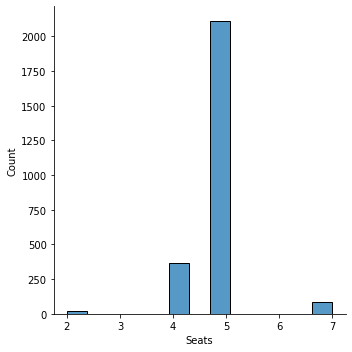

In [91]:
# Seats 컬럼을 히스토그램으로 확인

sns.displot(car_df['Seats'])

# 4-12. 이상치 탐지 및 처리 - Emission Class 컬럼

In [92]:
# 컬럼 이름을 Emission_Class 로 바꾸기로 한다.

car_df = car_df.rename({'Emission Class': 'Emission_Class'}, axis = 1)

In [93]:
# Emission_Class 컬럼의 결측치 확인
car_df['Emission_Class'].isna().sum()

8

In [94]:
car_df[car_df['Emission_Class'].isna()]

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_Class,Service history
95,RENAULT FLUENCE,2490,67104,2010,1.0,Diesel,Saloon,1.5,Manual,4.0,5.0,NaN,NaN
163,HONDA ODYSSEY,2449,88240,2012,NaN,Petrol,MPV,2.4,Automatic,5.0,7.0,NaN,NaN
178,MERCEDES-BENZ CLK,3995,70000,2009,NaN,Petrol,Coupe,2.0,Automatic,2.0,5.0,NaN,NaN
723,VOLKSWAGEN POLO,6995,65000,2012,NaN,Petrol,Hatchback,1.2,Automatic,5.0,5.0,NaN,NaN
972,TOYOTA YARIS,5480,52624,2013,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,NaN,NaN
1052,VOLKSWAGEN POLO,6495,66000,2011,1.0,Petrol,Hatchback,1.2,Automatic,5.0,5.0,NaN,NaN
1475,MAZDA 3,2495,100305,2008,NaN,Petrol,Hatchback,1.6,Manual,5.0,5.0,NaN,NaN
2712,MERCEDES-BENZ E CLASS DIESEL ESTATE,8855,74280,2012,2.0,Diesel,Estate,2.1,Automatic,5.0,5.0,NaN,NaN


In [95]:
# 결측치는 제거하기로 한다.

# 결측치 제거
car_df.dropna(subset = ['Emission_Class'], inplace = True)

# 확인
car_df[car_df['Emission_Class'].isna()]

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_Class,Service history


In [96]:
# Emission_Class 컬럼을 확인해본다

car_df['Emission_Class'].value_counts()

Euro 5    1055
Euro 4     795
Euro 6     612
Euro 3     104
Euro 2       6
Name: Emission_Class, dtype: int64

In [97]:
# Euro 2 는 제거하기로 한다.
car_df = car_df[car_df['Emission_Class'] != 'Euro 2']

# 확인
car_df['Emission_Class'].value_counts()

Euro 5    1055
Euro 4     795
Euro 6     612
Euro 3     104
Name: Emission_Class, dtype: int64

In [98]:
# Emission_Class 컬럼의 데이터를 숫자 형태로 변환하기

car_df['Emission_Class'] = car_df['Emission_Class'].str[-1:].astype('int')
car_df['Emission_Class']

0       6
1       4
2       5
3       4
4       5
       ..
3682    4
3683    5
3684    5
3685    4
3686    5
Name: Emission_Class, Length: 2566, dtype: int64

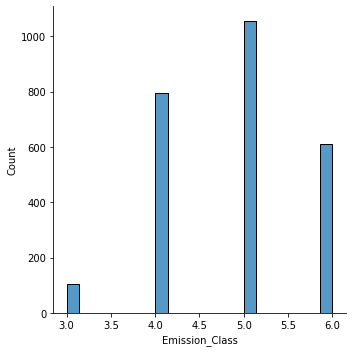

In [99]:
# Emission_Class 컬럼을 히스토그램으로 확인

sns.displot(car_df['Emission_Class'])

# 4-13. 이상치 탐지 및 처리 - Service history 컬럼

In [100]:
# 컬럼 이름을 Service_history 로 바꾸기로 한다.

car_df = car_df.rename({'Service history': 'Service_history'}, axis = 1)

In [101]:
# Service_history 컬럼의 결측치 확인
car_df['Service_history'].isna().sum()

2163

In [102]:
# 결측치를 Unknown 으로 대체
car_df['Service_history'].fillna('Unknown', inplace = True)

# 결측치 확인
car_df['Service_history'].isna().sum()

0

In [103]:
# Service_history 컬럼을 확인해본다

car_df['Service_history'].value_counts()

Unknown    2163
Full        403
Name: Service_history, dtype: int64

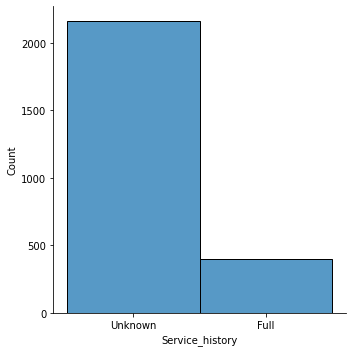

In [104]:
# Service_history 컬럼을 히스토그램으로 확인

sns.displot(car_df['Service_history'])

# 4-14. 기타 전처리.

## 1) Previous_Owners 결측치 Unknow 으로 채우기

In [105]:
# Previous_Owners 컬럼의 결측치 확인
car_df['Previous_Owners'].isna().sum()

868

In [106]:
# 결측치를 Unknown 으로 대체
car_df['Previous_Owners'].fillna('Unknown', inplace = True)

# 결측치 확인
car_df['Previous_Owners'].isna().sum()

0

In [107]:
# Previous_Owners 컬럼을 확인해본다

car_df['Previous_Owners'].value_counts()

Unknown    868
2.0        507
3.0        409
1.0        302
4.0        245
5.0        152
6.0         50
7.0         33
Name: Previous_Owners, dtype: int64

## 2) cars.csv와 brand.csv의 데이터 합치기

In [108]:
car_df

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_Class,Service_history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full
2,HYUNDAI I30,949,137000,2011,Unknown,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,Unknown
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full
4,VAUXHALL CORSA,1000,85000,2013,Unknown,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4,Unknown
3683,AUDI A4,6990,119000,2012,Unknown,Petrol,Saloon,2.0,Manual,4.0,5.0,5,Unknown
3684,BMW 3 SERIES,3995,139000,2013,Unknown,Diesel,Saloon,2.0,Manual,4.0,5.0,5,Unknown
3685,HONDA ACCORD,1390,179190,2007,Unknown,Diesel,Estate,2.2,Manual,5.0,5.0,4,Full


In [109]:
brand_df

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States
5,volvo,Sweden
6,peugeot,France
7,bmw,Germany
8,citroen,France
9,mercedes-benz,Germany


In [110]:
# 먼저 car_df 의 title 데이터를 소문자화
car_df['title'] = car_df['title'].str.lower()
car_df

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_Class,Service_history
0,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown
1,vauxhall corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full
2,hyundai i30,949,137000,2011,Unknown,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,Unknown
3,mini hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full
4,vauxhall corsa,1000,85000,2013,Unknown,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault megane,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4,Unknown
3683,audi a4,6990,119000,2012,Unknown,Petrol,Saloon,2.0,Manual,4.0,5.0,5,Unknown
3684,bmw 3 series,3995,139000,2013,Unknown,Diesel,Saloon,2.0,Manual,4.0,5.0,5,Unknown
3685,honda accord,1390,179190,2007,Unknown,Diesel,Estate,2.2,Manual,5.0,5.0,4,Full


In [111]:
# title 의 제일 앞 브랜드 이름만 추출
car_df['title'] = car_df['title'].str.split(expand = True).loc[:, 0]

In [112]:
# 확인
car_df['title']

0          skoda
1       vauxhall
2        hyundai
3           mini
4       vauxhall
          ...   
3682     renault
3683        audi
3684         bmw
3685       honda
3686    vauxhall
Name: title, Length: 2566, dtype: object

In [113]:
brand_df['title'].str[:]

0             skoda
1          vauxhall
2           hyundai
3              mini
4              ford
5             volvo
6           peugeot
7               bmw
8           citroen
9     mercedes-benz
10            mazda
11             saab
12       volkswagen
13            honda
14               mg
15           toyota
16             seat
17           nissan
18             alfa
19          renault
20              kia
21           proton
22             fiat
23             audi
24       mitsubishi
25            lexus
26             land
27        chevrolet
28           suzuki
29            dacia
30         daihatsu
31             jeep
32           jaguar
33         chrysler
34            rover
35               ds
36           daewoo
37            dodge
38          porsche
39           subaru
40         infiniti
41           abarth
42            smart
43           marcos
44         maserati
45        ssangyong
46          lagonda
47            isuzu
Name: title, dtype: object

In [114]:
# title 기준 car_df 에 inner join 으로 합치기
car_df = car_df.merge(brand_df, on = 'title', how = 'left')
car_df

,title,Price,Mileage,Registration_Year,Previous_Owners,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_Class,Service_history,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,Czech Republic
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full,United Kingdom
2,hyundai,949,137000,2011,Unknown,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,Unknown,South Korea
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full,United Kingdom
4,vauxhall,1000,85000,2013,Unknown,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,Unknown,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,renault,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4,Unknown,France
2562,audi,6990,119000,2012,Unknown,Petrol,Saloon,2.0,Manual,4.0,5.0,5,Unknown,Germany
2563,bmw,3995,139000,2013,Unknown,Diesel,Saloon,2.0,Manual,4.0,5.0,5,Unknown,Germany
2564,honda,1390,179190,2007,Unknown,Diesel,Estate,2.2,Manual,5.0,5.0,4,Full,Japan


In [115]:
# 최종 결과
car_df['country']

0       Czech Republic
1       United Kingdom
2          South Korea
3       United Kingdom
4       United Kingdom
             ...      
2561            France
2562           Germany
2563           Germany
2564             Japan
2565    United Kingdom
Name: country, Length: 2566, dtype: object

# 5. 범주형 데이터 원핫인코딩

In [116]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 0 to 2565
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2566 non-null   object 
 1   Price              2566 non-null   int64  
 2   Mileage            2566 non-null   int64  
 3   Registration_Year  2566 non-null   int64  
 4   Previous_Owners    2566 non-null   object 
 5   Fuel_type          2566 non-null   object 
 6   Body_type          2566 non-null   object 
 7   Engine             2566 non-null   float64
 8   Gearbox            2566 non-null   object 
 9   Doors              2566 non-null   float64
 10  Seats              2566 non-null   float64
 11  Emission_Class     2566 non-null   int64  
 12  Service_history    2566 non-null   object 
 13  country            2566 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 300.7+ KB


In [117]:
car_df['country'].value_counts()

Germany           568
United Kingdom    510
Japan             416
France            365
United States     335
South Korea       134
Italy             100
Czech Republic     43
Spain              41
Sweden             38
Romania            14
Malaysia            2
Name: country, dtype: int64

In [118]:
car_df['title'].value_counts()

vauxhall         386
ford             314
volkswagen       183
bmw              170
peugeot          154
nissan           125
renault          116
mercedes-benz    108
audi             103
toyota            94
citroen           91
honda             86
fiat              81
mini              76
hyundai           76
kia               55
mazda             50
skoda             43
seat              41
volvo             32
suzuki            32
land              20
jaguar            19
alfa              18
mitsubishi        17
chevrolet         14
dacia             14
mg                 6
saab               6
smart              4
ds                 4
jeep               4
lexus              4
chrysler           3
rover              3
infiniti           3
subaru             3
daihatsu           2
proton             2
ssangyong          2
daewoo             1
abarth             1
Name: title, dtype: int64

In [119]:
# pd.get_dummies 통한 원핫 인코딩. drop_first = True - 다중공선성 문제 해소를 위해 설정
car_df_onehot = pd.get_dummies(car_df, columns = ['title', 'Previous_Owners','Fuel_type','Body_type','Gearbox', 'Service_history', 'country'], drop_first = True)
car_df_onehot

,Price,Mileage,Registration_Year,Engine,Doors,Seats,Emission_Class,title_alfa,title_audi,title_bmw,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,6900,70189,2016,1.4,5.0,5.0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1495,88585,2008,1.2,3.0,5.0,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,949,137000,2011,1.4,5.0,5.0,5,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2395,96731,2010,1.4,3.0,4.0,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1000,85000,2013,1.3,5.0,5.0,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,1395,76202,2006,1.6,5.0,5.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2562,6990,119000,2012,2.0,4.0,5.0,5,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2563,3995,139000,2013,2.0,4.0,5.0,5,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2564,1390,179190,2007,2.2,5.0,5.0,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# 6. 스케일링

In [120]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [121]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

## 어떤 스케일링 방법을 선택할 것인가 - 

1. 데이터 별로 정규분포를 따르는 변수와 특정 방향으로 쏠려있는 데이터가 있다. 이러한 경우 어떤 기준으로 스케일링 해야할지 앞으로 공부해 봐야 할 것 같다.


2. 전체적으로 이상치 데이터를 제거 했기 때문에 StandardScaler 스케일러를 사용하기로 한다.


3. 비교를 위해 RobustScaler 또한 적용해 본다.

## 1) StandardScaler()

In [122]:
# 복사파일 준비
car_df2 = car_df_onehot.copy()

# 컬럼별 스케일링 연산
ss.fit(car_df2)

# 판다스 데이터프레임으로 전환 및 컬럼 이름 주기
car_df2 = pd.DataFrame(ss.transform(car_df2), columns = car_df2.columns)
car_df2

,Price,Mileage,Registration_Year,Engine,Doors,Seats,Emission_Class,title_alfa,title_audi,title_bmw,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,0.531991,-0.392508,1.056588,-0.457698,0.673421,0.180111,1.390097,-0.08405,-0.204497,-0.266367,...,-0.533183,-0.201374,-0.439873,-0.027929,-0.074067,-0.234731,-0.127427,-0.122604,-0.498051,-0.387501
1,-0.995850,0.166623,-0.830452,-1.011685,-1.399763,0.180111,-1.022476,-0.08405,-0.204497,-0.266367,...,-0.533183,-0.201374,-0.439873,-0.027929,-0.074067,-0.234731,-0.127427,-0.122604,2.007828,-0.387501
2,-1.150189,1.638157,-0.122812,-0.457698,0.673421,0.180111,0.183811,-0.08405,-0.204497,-0.266367,...,-0.533183,-0.201374,-0.439873,-0.027929,-0.074067,4.260194,-0.127427,-0.122604,-0.498051,-0.387501
3,-0.741445,0.414214,-0.358692,-0.457698,-1.399763,-1.563910,-1.022476,-0.08405,-0.204497,-0.266367,...,-0.533183,-0.201374,-0.439873,-0.027929,-0.074067,-0.234731,-0.127427,-0.122604,2.007828,-0.387501
4,-1.135773,0.057660,0.348948,-0.734692,0.673421,0.180111,0.183811,-0.08405,-0.204497,-0.266367,...,-0.533183,-0.201374,-0.439873,-0.027929,-0.074067,-0.234731,-0.127427,-0.122604,2.007828,-0.387501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,-1.024117,-0.209748,-1.302212,0.096289,0.673421,0.180111,-1.022476,-0.08405,-0.204497,-0.266367,...,-0.533183,-0.201374,-0.439873,-0.027929,-0.074067,-0.234731,-0.127427,-0.122604,-0.498051,-0.387501
2562,0.557432,1.091062,0.113068,1.204264,-0.363171,0.180111,0.183811,-0.08405,4.890053,-0.266367,...,1.875528,-0.201374,-0.439873,-0.027929,-0.074067,-0.234731,-0.127427,-0.122604,-0.498051,-0.387501
2563,-0.289170,1.698945,0.348948,1.204264,-0.363171,0.180111,0.183811,-0.08405,-0.204497,3.754213,...,1.875528,-0.201374,-0.439873,-0.027929,-0.074067,-0.234731,-0.127427,-0.122604,-0.498051,-0.387501
2564,-1.025531,2.920487,-1.066332,1.758251,0.673421,0.180111,-1.022476,-0.08405,-0.204497,-0.266367,...,-0.533183,-0.201374,2.273383,-0.027929,-0.074067,-0.234731,-0.127427,-0.122604,-0.498051,-0.387501


# 2) RobustScaler()

In [123]:
# 복사파일 준비
car_df3 = car_df_onehot.copy()

# 컬럼별 스케일링 연산
rs.fit(car_df3)

# 판다스 데이터프레임으로 전환 및 컬럼 이름 주기
car_df3 = pd.DataFrame(rs.transform(car_df3), columns = car_df3.columns)
car_df3

,Price,Mileage,Registration_Year,Engine,Doors,Seats,Emission_Class,title_alfa,title_audi,title_bmw,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,0.656833,-0.282170,1.0,-0.4,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.546618,0.135920,-0.6,-0.8,-1.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.668188,1.236261,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.346229,0.321057,-0.2,-0.4,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.656833,0.054443,0.4,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,-0.568884,-0.145511,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2562,0.676872,0.827170,0.2,0.8,-0.5,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2563,0.010019,1.281716,0.4,0.8,-0.5,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2564,-0.569997,2.195125,-0.8,1.2,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 8. 주성분 분석

In [124]:
from sklearn.decomposition import PCA

## 1) StandardScaler 적용 데이터(원핫인코딩 o)  PCA

In [125]:
# 주성분을 10개로 제한
pca = PCA(10)

In [126]:
# 1. StandardScaler 를 적용한 데이터 fit
pca.fit(car_df2)

PCA(n_components=10)

In [127]:
# 결과를 데이터프레임으로
pd.DataFrame(pca.transform(car_df2))

,0,1,2,3,4,5,6,7,8,9
0,-1.157849,1.322302,-0.306336,0.249834,0.403766,0.092478,0.210346,0.037975,0.451405,-0.270065
1,-0.894833,-2.102509,0.923992,2.271323,-1.865136,0.412713,-0.307019,0.252854,-0.208589,-0.013208
2,-0.871700,-0.782962,-0.674557,-0.714574,0.018184,-1.024534,1.987689,4.889294,-1.785098,0.056433
3,-0.372708,-2.219264,2.447165,1.425027,-2.010170,-0.088620,-0.419268,0.237120,-0.564937,0.224466
4,-1.021096,-0.503415,0.386566,2.559290,-1.602151,0.288492,-0.315973,0.115675,-0.078385,0.092254
...,...,...,...,...,...,...,...,...,...,...
2561,-0.630029,-1.981257,-0.681203,-0.570871,1.124321,3.444864,-0.464170,0.336067,-0.300488,0.141167
2562,3.039683,1.095326,1.279357,-0.333343,0.537966,-0.410560,-0.611363,0.073566,0.222718,0.202882
2563,3.889597,1.373725,0.973067,-0.124446,0.637974,-0.255106,-0.555794,0.098411,0.160475,0.182873
2564,2.814367,-1.368005,-3.252941,-0.443101,-1.737628,-0.029836,0.784639,-0.403565,0.436672,0.059354


In [128]:
# 주성분 별 전체 분산을 설명하는 비율 확인
pca.explained_variance_ratio_ 

array([0.05151257, 0.04502318, 0.03717997, 0.03142507, 0.03128387,
       0.02985767, 0.0284986 , 0.02750896, 0.02724093, 0.02665441])

In [129]:
# 10개의 주성분이 전체 분산을 설명하는 비울
(pca.explained_variance_ratio_).sum()

0.33618523553829716

## 해석(원핫인코딩, StandardScaler 적용)

- 가장 첫번째 주성분이 전체 분산을 설명하는 비율은 약 5% 이고, 10개의 주성분이 전체 분산을 설명하는 총 비율은 약 33.6% 로 나왔다.

## 2) BobustScaler 적용 데이터(원핫인코딩 o) PCA

In [130]:
# 주성분을 10개로 제한
pca = PCA(10)

In [131]:
# 2. RobustScaler 를 적용한 데이터 fit
pca.fit(car_df3)

PCA(n_components=10)

In [132]:
# 결과를 데이터프레임으로
pd.DataFrame(pca.transform(car_df3))

,0,1,2,3,4,5,6,7,8,9
0,1.510992,0.068941,-0.536809,-0.382705,-0.222832,-0.166202,-0.122922,-0.050381,0.207712,0.772493
1,-1.145871,-1.179112,-0.129848,-0.367930,1.056628,-0.449238,-0.302233,-0.150271,-0.032818,-0.043182
2,-0.758647,-0.298454,-0.913035,-0.862192,-0.220851,0.672631,0.569183,-0.266040,-0.205903,-0.111317
3,-0.969721,-0.910065,0.622694,-0.822002,0.500417,-0.459052,-0.076651,0.316951,-0.134687,0.006705
4,-0.066434,-0.512549,-0.745628,-0.577279,1.155348,0.620756,0.230737,-0.128048,0.108731,-0.140051
...,...,...,...,...,...,...,...,...,...,...
2561,-1.421268,-0.721197,-0.210286,0.510320,-0.148154,-0.362675,-0.033736,-0.335717,0.876685,0.036231
2562,-0.146246,1.331544,0.499584,-0.316317,-0.147108,0.663503,0.216414,-0.477862,-0.296925,-0.077885
2563,-0.480529,1.770027,0.101156,-0.853800,-0.202616,0.714258,0.345861,-0.375600,0.021413,-0.171378
2564,-2.293707,1.632851,-0.771279,-0.460732,-0.096551,0.352355,1.106160,0.503021,-0.484904,-0.154564


In [133]:
# 주성분 별 전체 분산을 설명하는 비율 확인
pca.explained_variance_ratio_ 

array([0.27830047, 0.12509199, 0.07072188, 0.05441732, 0.04352965,
       0.0377946 , 0.03342237, 0.03090892, 0.02882089, 0.02422133])

In [134]:
# 10개의 주성분이 전체 분산을 설명하는 비울
(pca.explained_variance_ratio_).sum()

0.7272294207561986

## 해석(원핫인코딩, RobustScaler 적용)

- 가장 첫번째 주성분이 전체 분산을 설명하는 비율은 약 28% 이고, 10개의 주성분이 전체 분산을 설명하는 총 비율은 약 72.7% 로 나왔다.


- Price 변수를 비롯하여 정규분포를 따르지 않는 많은 다른 변수들로 인해 robust한 방식이 좀더 전체 분산을 잘 설명한 것 같다.

## 3) 원핫 인코딩 적용하지 않은 데이터를 RobustScaler 로 처리 후 PCA 를 시도해보았다.

In [135]:
# 복사파일 준비
car_df4 = car_df.copy()
car_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 0 to 2565
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2566 non-null   object 
 1   Price              2566 non-null   int64  
 2   Mileage            2566 non-null   int64  
 3   Registration_Year  2566 non-null   int64  
 4   Previous_Owners    2566 non-null   object 
 5   Fuel_type          2566 non-null   object 
 6   Body_type          2566 non-null   object 
 7   Engine             2566 non-null   float64
 8   Gearbox            2566 non-null   object 
 9   Doors              2566 non-null   float64
 10  Seats              2566 non-null   float64
 11  Emission_Class     2566 non-null   int64  
 12  Service_history    2566 non-null   object 
 13  country            2566 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 300.7+ KB


In [136]:
# 수치형 데이터 제외한 컬럼 삭제
car_df4 = car_df4.select_dtypes(exclude=['object'])

# 컬럼별 스케일링 연산
rs.fit(car_df4)

# 판다스 데이터프레임으로 전환 및 컬럼 이름 주기
car_df4 = pd.DataFrame(rs.transform(car_df4), columns = car_df4.columns)
car_df4

,Price,Mileage,Registration_Year,Engine,Doors,Seats,Emission_Class
0,0.656833,-0.282170,1.0,-0.4,0.0,0.0,1.0
1,-0.546618,0.135920,-0.6,-0.8,-1.0,0.0,-1.0
2,-0.668188,1.236261,0.0,-0.4,0.0,0.0,0.0
3,-0.346229,0.321057,-0.2,-0.4,-1.0,-1.0,-1.0
4,-0.656833,0.054443,0.4,-0.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2561,-0.568884,-0.145511,-1.0,0.0,0.0,0.0,-1.0
2562,0.676872,0.827170,0.2,0.8,-0.5,0.0,0.0
2563,0.010019,1.281716,0.4,0.8,-0.5,0.0,0.0
2564,-0.569997,2.195125,-0.8,1.2,0.0,0.0,-1.0


In [137]:
# 주성분을 3개로 제한 (수치형 데이터 컬럼이 7개)
pca = PCA(3)

In [138]:
# 2. RobustScaler 를 적용한 데이터 fit
pca.fit(car_df4)

PCA(n_components=3)

In [139]:
# 결과를 데이터프레임으로
pd.DataFrame(pca.transform(car_df4))

,0,1,2
0,1.512576,-0.132590,-0.391071
1,-1.204050,0.939250,-0.241497
2,-0.744742,-0.353056,-0.955578
3,-1.005734,0.791372,0.518843
4,-0.095007,0.345586,-0.825744
...,...,...,...
2561,-1.432801,0.413550,-0.191038
2562,-0.064015,-1.166244,0.400120
2563,-0.423980,-1.317865,0.064134
2564,-2.273760,-1.689591,-0.131314


In [140]:
# 주성분 별 전체 분산을 설명하는 비율 확인
pca.explained_variance_ratio_ 

array([0.53539503, 0.17194526, 0.11400082])

In [141]:
# 3개의 주성분이 종속변수의 분산을 설명하는 비울
(pca.explained_variance_ratio_).sum()

0.8213411156134822

## 결론

- 수치형 변수 7개만 가지고 RobustScaler 를 통해 PCA 한 결과 3개의 주성분으로 전체 분산의 82%를 설명하였다.


- 다른 그루분이 데이터의 이상치를 제거하지 않고 원핫 인코딩을 진행한 결과를 보여주셨는데 주성분 하나가 데이터 전체 분산의 99.99%를 설명하는 결과가 나왔었다. 그래서 나는 이상치 처리를 꼼꼼하게 해본 결과를 보고 싶어서 전처리 작업을 거친 후 적용 결과를 보니 1), 2) 에서와 같이 극단적인 주성분은 나오지는 않았다.


- 결과적으로 거리기반 예측 모델을 만들 때 원핫인코딩 + RobustScaler 를 적용한 2번 PCA 를 사용하는 것이 괜찮을 거라는 생각이 들었다. 이 모델은 10개의 주성분이 전체 분산을 설명하는 비율이 각각 [0.27830047, 0.12509199, 0.07072188, 0.05441733, 0.04352964, 0.0377945 , 0.03342199, 0.03090845, 0.02882077, 0.02422335] 로 총합 약 72% 가 나오게 되었다.


- 여러개의 클러스트를 생성하는데 1번째 주성분이 너무 비중이 크면(반대의 경우도) 여러 변수를 고려한 다양한 집단으로 클러스터링을 하는데 어려움이 있지 않을까 판단했다. 물론 이 부분에 대해서 앞으로 좀더 공부해봐야 알 것 같다.